# Breast Cancer

Breast cancer is a disease in which cells in the breast grow out of control.

**Symptoms**

* Skin changes, such as swelling, redness, or other visible differences in one or both breasts
* An increase in size or change in shape of the breast(s)
* Changes in the appearance of one or both nipples
* Nipple discharge other than breast milk
* General pain in/on any part of the breast
* Lumps or nodes felt on or inside of the breast

from : https://www.cancercenter.com/cancer-types/breast-cancer/symptoms

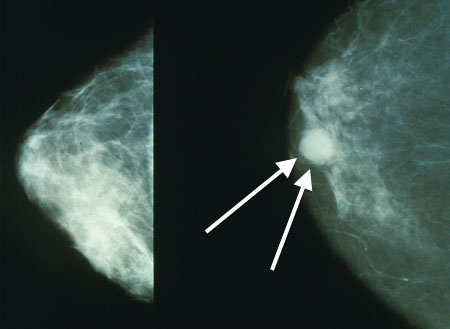

Data used from : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data file
dataset = pd.read_csv("../input/breast-cancer-wisconsin-data/data.csv")

In [ ]:
# data info
dataset.info()

In [ ]:
# first 7 lines of data
dataset.head(7)

In [ ]:
# features
dataset.columns

**Correlation**

Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight).

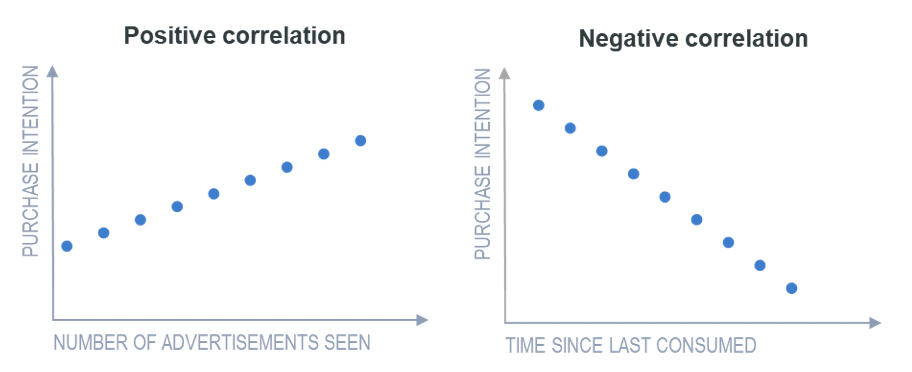


* 1 indicates a perfect positive correlation.
* -1 indicates a perfect negative correlation.
* 0 indicates that there is no relationship between the different variables.

from: https://www.displayr.com/what-is-correlation/

In [ ]:
# correlation table
dataset.corr()

# Data Visulatization

**MATPLOTLIB**

Matplot is a python library that help us to plot data.
Some plots: Line, Scatter, Histogram.
* Line plot is better when x axis is time.
* Scatter is better when there is correlation between two variables.
* Histogram is better when we need to see distribution of numerical data.

In [ ]:
# correlation table visulation
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(dataset.corr(), annot = True, linewidth = 2, fmt = '.1f', ax = ax)
plt.show()

<h2> Bar Plot </h2>

In [ ]:
data_frame = pd.DataFrame(dataset)
data_frame['diagnosis'].value_counts().plot(kind='bar', color='red', alpha=0.5, figsize=(12,7))
plt.title("Bar Plot with Diagnosis Values")
plt.xlabel("Diagnosis Values")
plt.ylabel("Number of Values")
plt.show()

<h2> Line Plot </h2>

In [ ]:
dataset.area_worst.plot(kind='line', color='red', alpha=0.5, label="Area Worst", grid=True, linestyle=":", figsize=(12,7))
dataset.area_mean.plot(kind='line', color='blue', alpha=0.7, label= "Area Mean", grid=True ,linestyle="-")
plt.title("Line Plot with Area")
plt.legend()
plt.show()

In [ ]:
data1 = dataset.loc[:, ["area_mean", "area_worst", "radius_mean"]]
data1.plot(figsize=(12, 7), grid=True)
plt.show()

In [ ]:
data1.plot(subplots=True, figsize=(12,7))
plt.show()

<h2> Scatter Plot </h2>

In [ ]:
dataset.plot(kind='scatter', x='area_worst', y='area_mean', grid=True, alpha=0.5, color="green", figsize=(12, 7))
plt.title("Scatter Plot with Area")
plt.xlabel("Area Worst")
plt.ylabel("Area Mean")
plt.show()

In [ ]:
data1.plot(kind="scatter", x="area_mean", y="radius_mean", figsize=(12,7), fontsize=15, color="gray", alpha=0.7, grid=True)
plt.title("Scatter Plot between Area Mean and Radius Mean")
plt.show()

<h2>Histogram</h2>

In [ ]:
data_frame['smoothness_mean'].value_counts().plot(kind='hist', color='red', alpha=0.5, figsize=(12,7))
plt.xlabel("Smoothness Mean")
plt.show()

> We can use <b>"density=True"</b> parameter for normalize our datas

In [ ]:
data1.plot(kind="hist", y="area_mean", bins=50, range=(0,250), density=True, color="red", alpha=0.5, figsize=(12,7), grid=True)
plt.xlabel("Area Mean")
plt.show()

> <b>"cumulative=True"</b> parameter means cumulative frequency.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
data1.plot(kind="hist", y="area_mean", bins=50, range=(0,250), density=True, ax=axes[0], figsize=(12,7))
data1.plot(kind="hist", y="area_mean", bins=50, range=(0,250), density=True, ax=axes[1], cumulative=True)
plt.xlabel("Area Mean")
plt.show()

<h2> Box Plot </h2>

In [ ]:
dataset.boxplot(column=["area_mean", "area_worst"], fontsize=15, figsize=(12,7))
plt.show()

<h3>Filtering with logical and: </h3>

In [ ]:
dataset[np.logical_and(dataset["area_mean"] > 200, dataset["area_worst"] < 300)]

<h3> List Comprehension </h3>

In [ ]:
threshold = 10.00
dataset["m_radius"] = ["value m" if i>threshold else "value b" for i in dataset.radius_mean]
dataset.loc[:10, ["m_radius", "radius_mean", "diagnosis"]]

<h3> Value counts </h3>

In [ ]:
print(dataset["area_mean"].value_counts(dropna=False))

In [ ]:
assert dataset["area_mean"].notnull().all() # turns nothing because we dont have nan values

<h3> Print data types </h3>

In [ ]:
dataset.dtypes

<h3> Concatenating Datas </h3>

1. Vertical concatenating
2. Horizontal concatenating

In [ ]:
data1 = data_frame.head(7)
data2 = data_frame.tail(7)
vertical = pd.concat([data1, data2], axis=0, ignore_index=True)
vertical

In [ ]:
data1 = dataset["area_mean"].head(7)
data2 = dataset["radius_mean"].head(7)
horizontal = pd.concat([data1, data2], axis=1)
horizontal

<h3> Tidy Data with Melt </h3>

In [ ]:
new_data = dataset.head(7)
melted = pd.melt(frame=new_data, id_vars="diagnosis", value_vars=["area_mean", "area_worst"])
melted